# 경로설정과 module import

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import os
import matplotlib as pt
import pykrx
pt.use("Qt5Agg") ##플랏
sys.path.append(r'C:\Users\pc\Desktop\stock\P_R\wrapper')
from wrapper import data_pred
from wrapper import trading
from wrapper import trend
from wrapper import visualization

# 자료 읽어오기/ base_date 설정

In [5]:
os.chdir(r'C:\Users\pc\Desktop\stock\Modeling\Basic')
cd ='KOSPI 200'
path = 'C:/Users/pc/Desktop/stock/Modeling/Basic/data/'


portfolio = {
    'World indices' : ['Kospi 200', 'S&P 500', 'Nikkei 225', 'CSI 300']
}   ## 딕셔너리 형태
p_name = 'World indices'
p_cd = portfolio[p_name]

ld = data_pred.LoadData()
df = ld.read_master_file(path,p_name)

base_date = '2018-01-08'
sample_df = pd.DataFrame()
#지금은 cd를 kospi column으로 잡아놈
sample_df[cd] = df[cd].copy()

## 결측치 제거후 데이터 처리

In [6]:
sample_df = sample_df.dropna() ### na제거
sample_df['diff'] = sample_df[cd] - sample_df[cd].shift(1) ##한칸씩 뒤로 미뤄 뺴서, 전일과의 차이를 입력
print(sample_df.head(3))

            KOSPI 200  diff
Date                       
2017-01-02     260.36   nan
2017-01-03     262.97  2.61
2017-01-04     263.12  0.15


In [7]:
'''
d, ad, u, au = 0, 0., 0, 0.  ###  # of down, sum of down, # of up, sum of up
for i in range(20):
    diff = sample_df.shift(i).loc[base_date, 'diff']  ## i일 전의 diff값을 읽어와서
    if diff >= 0:  #양수이면
        u += 1   # count 해주고
        au += diff ##누적으로 더해줘
    elif diff < 0: #음수면
        d += 1 # count 해주고
        ad -= diff ## 누적으로 빼줘( 음수니까 마이너스해줘야 플러스로 돌아오지)
#print(u, au, d, ad)
rsi = (au/(au+ad)) * 100
print(rsi)
'''

"\nd, ad, u, au = 0, 0., 0, 0.  ###  # of down, sum of down, # of up, sum of up\nfor i in range(20):\n    diff = sample_df.shift(i).loc[base_date, 'diff']  ## i일 전의 diff값을 읽어와서\n    if diff >= 0:  #양수이면\n        u += 1   # count 해주고\n        au += diff ##누적으로 더해줘\n    elif diff < 0: #음수면\n        d += 1 # count 해주고\n        ad -= diff ## 누적으로 빼줘( 음수니까 마이너스해줘야 플러스로 돌아오지)\n#print(u, au, d, ad)\nrsi = (au/(au+ad)) * 100\nprint(rsi)\n"

### 위를 모듈로 구현해 놓음

In [8]:
%matplotlib inline

            KOSPI 200  diff  RSI10
Date                              
2017-01-02     260.36   nan    nan
2017-01-03     262.97  2.61    nan
2017-01-04     263.12  0.15    nan
2017-01-05     261.98 -1.14    nan
2017-01-06     263.20  1.22    nan
None


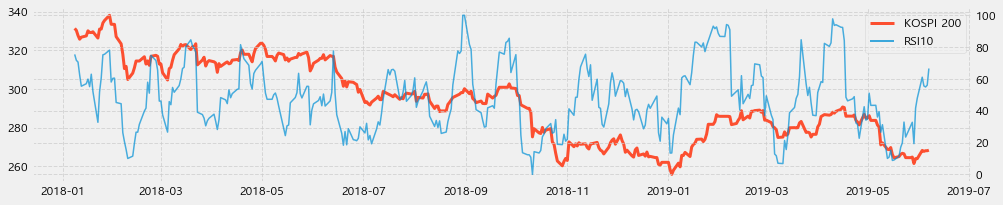

In [9]:
%matplotlib inline
trading.Trade.rsi(df=sample_df, period= 10)
##이건 간단하게 확인해본 것이라 객체를 따로 안만들게 self 뺴고 넣었다.
print(sample_df.head())

##시각화
v = visualization.Visualize()
print(v.multi_line_view(sample_df, base_date, [cd], ['RSI10'], (15,3)))

# 최근 경향에 가중치를 더 주는 방향으로 코딩

In [ ]:
'''
    def WRSI(self, df, cd, period, base_date):
        rsi_df = pd.DataFrame()
        rsi_df[cd] = df[cd].copy()
        rsi_df = rsi_df.dropna()
        rsi_df['diff'] = rsi_df[cd] - rsi_df[cd].shift(1)
        for p in rsi_df.iloc[period:].index:
            d, ad, u, au, multiple = 0, 0., 0, 0., 0.
            for i in range(period):
                multiple = (period - i) / period
                diff = rsi_df.shift(i).loc[p, 'diff']
                if diff >= 0:
                    u += 1
                    au += diff * multiple
                elif diff < 0:
                    d += 1
                    ad -= diff * multiple
            if not au + ad == 0:
                rsi = round(au / (au + ad), 4) * 100
            else:
                rsi = 0
            rsi_df.loc[p, 'WRSI' + str(period)] = rsi
        return (rsi_df[base_date:])
'''

# multiple = (period - i) / period

In [10]:
tr = trend.Trend()
wrsi = tr.WRSI(sample_df, cd, 20, base_date)
print(wrsi.tail())

            KOSPI 200  diff  WRSI20
Date                               
2019-06-03     268.16  4.27   48.72
2019-06-04     267.66 -0.50   49.45
2019-06-05     267.99  0.33   52.81
2019-06-06     267.99  0.00   55.53
2019-06-07     268.27  0.28   57.81


None


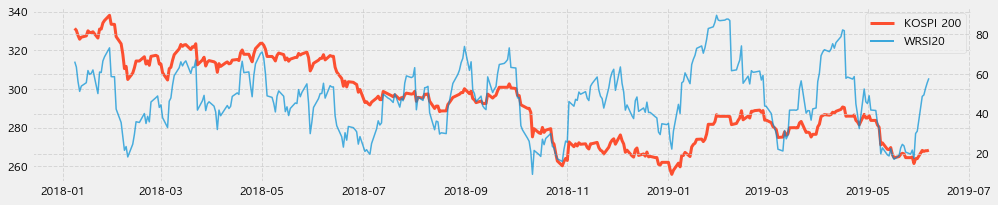

In [11]:
v = visualization.Visualize()
print(v.multi_line_view(wrsi, base_date, [cd], ['WRSI20'], (15,3)))


# 한번의 상승폭, 하락폭의 크기를 고려할 방법은 없을까